In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
df = pd.read_csv("customer.csv")
df.head(5)

,CustomerID,AnnualIncome,SpendingScore
0,1,15,39
1,2,16,81
2,3,17,6
3,4,18,77
4,5,19,40


In [52]:
x =  df[["AnnualIncome","SpendingScore"]]

scalar = StandardScaler()

x_scalar = scalar.fit_transform(x)

model = KMeans(n_clusters=5,random_state=42)

model.fit_transform(x_scalar)

y_pred = model.labels_

print(y_pred)

centroids_scaled = model.cluster_centers_

# 6. Convert centroids back to original scale
centroids = scalar.inverse_transform(centroids_scaled)



[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 1 3 1 3 3 3 1 3 1 3 4 3 4 3
 4 3 4]


In [53]:
import numpy as np

sample = np.array([[90,80]])

data = model.predict(sample)



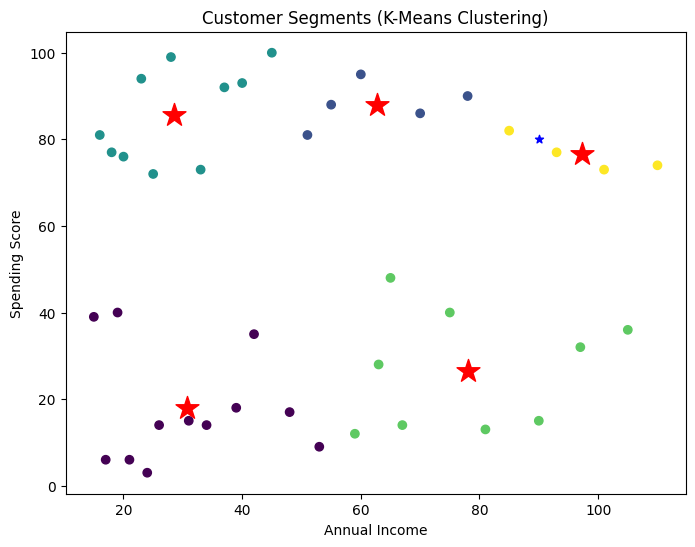

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(x["AnnualIncome"], x["SpendingScore"], c=y_pred)
plt.scatter(sample[:,0],sample[0:,1],marker="*",color = "blue")
plt.scatter(
    centroids[:, 0],        # Annual Income
    centroids[:, 1],        # Spending Score
    marker='*',
    s=300,
    c='red',
    label='Centroids'
)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.title("Customer Segments (K-Means Clustering)")
plt.show()